In [1]:
!pip install scikit-learn

In [2]:
# Import Dependencies
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
from pathlib import Path

In [4]:
# Add project root
sys.path.append(str(Path().resolve().parent))

In [5]:
# Import Data Ingestor
from src.ingestion.zip_data_ingestor import ZipDataIngestor

In [6]:
# Import preprocessing
from src.preprocessing.cleaner import DataCleaner
from src.preprocessing.feature_engineering import FeatureEngineer

In [7]:
df = pd.read_csv("C:\\Users\\oluwa\\OneDrive\\Desktop\\From Click to Cart Behavioral Insights from E-commerce Users\\notebooks\\extracted_data\\Shopping Trends And Customer Behaviour Dataset.csv")
df

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [8]:
# Clean the data
cleaner = DataCleaner(df)
df_cleaned = cleaner.clean()
df_cleaned

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,1,Express,1,1,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,1,Express,1,1,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,1,Free Shipping,1,1,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,1,Next Day Air,1,1,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,1,Free Shipping,1,1,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,0,2-Day Shipping,0,0,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,0,Store Pickup,0,0,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,0,Standard,0,0,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,0,Express,0,0,24,Venmo,Weekly


In [9]:
# Feature Engineering
engineer = FeatureEngineer(df_cleaned)
df_features = engineer.generate_features()
df_features


,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,color,season,review_rating,...,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group,spender_type,purchase_frequency_score,review_sentiment,shipping_speed,used_discount_or_promo
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,...,1,14,Venmo,Fortnightly,55-64,Mid Spender,5,Medium,Standard,1
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,...,1,2,Cash,Fortnightly,18-24,Mid Spender,5,Medium,Standard,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,...,1,23,Credit Card,Weekly,45-54,High Spender,7,Medium,Standard,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,...,1,49,PayPal,Weekly,18-24,High Spender,7,Medium,Standard,1
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,...,1,31,PayPal,Annually,45-54,Mid Spender,1,Low,Standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,...,0,32,Venmo,Weekly,35-44,Low Spender,7,High,Standard,0
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,...,0,41,Bank Transfer,Bi-Weekly,45-54,Mid Spender,6,High,Standard,0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,...,0,24,Venmo,Quarterly,45-54,Low Spender,2,Low,Standard,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,...,0,24,Venmo,Weekly,35-44,High Spender,7,Medium,Standard,0


In [10]:
sentiment_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_features['review_sentiment_score'] = df_features['review_sentiment'].map(sentiment_map)
df_features

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,color,season,review_rating,...,previous_purchases,payment_method,frequency_of_purchases,age_group,spender_type,purchase_frequency_score,review_sentiment,shipping_speed,used_discount_or_promo,review_sentiment_score
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,...,14,Venmo,Fortnightly,55-64,Mid Spender,5,Medium,Standard,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,...,2,Cash,Fortnightly,18-24,Mid Spender,5,Medium,Standard,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,...,23,Credit Card,Weekly,45-54,High Spender,7,Medium,Standard,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,...,49,PayPal,Weekly,18-24,High Spender,7,Medium,Standard,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,...,31,PayPal,Annually,45-54,Mid Spender,1,Low,Standard,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,...,32,Venmo,Weekly,35-44,Low Spender,7,High,Standard,0,2
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,...,41,Bank Transfer,Bi-Weekly,45-54,Mid Spender,6,High,Standard,0,2
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,...,24,Venmo,Quarterly,45-54,Low Spender,2,Low,Standard,0,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,...,24,Venmo,Weekly,35-44,High Spender,7,Medium,Standard,0,1


In [12]:
spender_map = {'Low Spender': 0, 'Mid Spender': 1, 'High Spender': 2}
df_features['spender_score'] = df_features['spender_type'].map(spender_map)
df_features

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,color,season,review_rating,...,payment_method,frequency_of_purchases,age_group,spender_type,purchase_frequency_score,review_sentiment,shipping_speed,used_discount_or_promo,review_sentiment_score,spender_score
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,...,Venmo,Fortnightly,55-64,Mid Spender,5,Medium,Standard,1,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,...,Cash,Fortnightly,18-24,Mid Spender,5,Medium,Standard,1,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,...,Credit Card,Weekly,45-54,High Spender,7,Medium,Standard,1,1,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,...,PayPal,Weekly,18-24,High Spender,7,Medium,Standard,1,1,2
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,...,PayPal,Annually,45-54,Mid Spender,1,Low,Standard,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,...,Venmo,Weekly,35-44,Low Spender,7,High,Standard,0,2,0
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,...,Bank Transfer,Bi-Weekly,45-54,Mid Spender,6,High,Standard,0,2,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,...,Venmo,Quarterly,45-54,Low Spender,2,Low,Standard,0,0,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,...,Venmo,Weekly,35-44,High Spender,7,Medium,Standard,0,1,2


In [13]:
# Select relevant features
features = ['spender_score', 'review_sentiment_score', 'subscription_status', 'purchase_frequency_score']
X = df_features[features].dropna()
X

,spender_score,review_sentiment_score,subscription_status,purchase_frequency_score
0,1,1,1,5
1,1,1,1,5
2,2,1,1,7
3,2,1,1,7
4,1,0,1,1
...,...,...,...,...
3895,0,2,0,7
3896,1,2,0,6
3897,0,0,0,2
3898,2,1,0,7


In [14]:
#Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Fit KMeans
Kmeans = KMeans(n_clusters=3, random_state=42)
df_features['cluster'] = Kmeans.fit_predict(X_scaled)
df_features['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
3895    0
3896    0
3897    1
3898    0
3899    1
Name: cluster, Length: 3900, dtype: int32

In [26]:
# Using Silhouette Score for Evaluation
print("Silhouette Score:", silhouette_score(X_scaled, df_features['cluster']))

Silhouette Score: 0.24892322827324323


In [ ]:
#Visualize and profile clusters

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

In [17]:
df_features['PC1'] = components[:, 0]
df_features['PC2'] = components[:, 1]

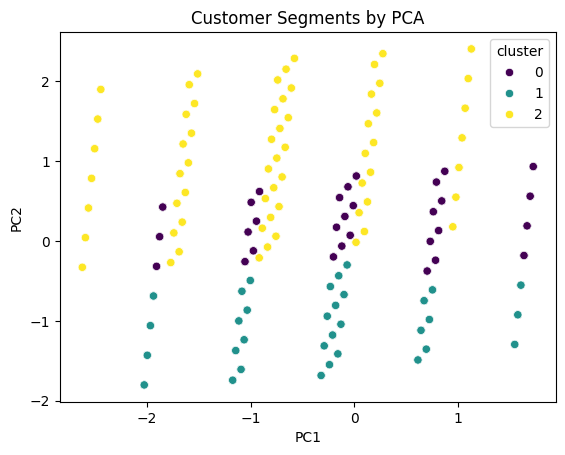

In [18]:
sns.scatterplot(data=df_features, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title("Customer Segments by PCA")
plt.show()

In [19]:
df_features['spender_score'] = df_features['spender_score'].astype(int)
df_features['purchase_frequency_score'] = df_features['purchase_frequency_score'].astype(int)
df_features['subscription_status'] = df_features['subscription_status'].astype(int)
df_features['review_sentiment_score'] = df_features['review_sentiment_score'].astype(int)


In [20]:
cluster_profile = df_features.groupby('cluster')[
    ['spender_score', 'purchase_frequency_score', 'review_sentiment_score', 'subscription_status']
].mean().round(2)

cluster_profile

,spender_score,purchase_frequency_score,review_sentiment_score,subscription_status
cluster,,,,
0,1.18,5.72,1.30,0.0
1,1.03,2.31,1.20,0.0
2,1.09,3.99,1.24,1.0


In [21]:
customer_id = 3896
df_features[df_features['customer_id'] == customer_id]['cluster']

3895    0
Name: cluster, dtype: int32

### -- Objective 
-- To identify distinct customer segments based on behavioural and transactional data, with the aim of informing personalized marketing strategies and retention efforts. 


Key Findings:
- Cluster 0 - Active Mid Spenders
--Spending: Mid to high
--Purchase Frequency: High - fortnightly/bi-weekly
--Review Sentiment: Strongly positive
--Subscription: Not subscribed
--Insight: These users are highly engaged and satisfied but have not opted into the subscription. They present a clear opportunity for subscription conversion campaigns. 

- Cluster 1 - Occassional Mid Spenders
--Spending: Average 
--Purchase Frequency: Low - quarterly
--Review Sentiment: Moderatley positive
--Subscription: Not subscribed
--Insight: This segment is passive. They shop infrequently and are moderately satisfied. Potential strategies include reactivation offers, product recommendations, and customer satisfaction feedback loops. 

- Cluster 2 - Engaged Subscribers (Mid Spenders)
--Spending: Mid
--Purchase Frequency: Moderate- Monthly
--Review Sentiment: Fairly positive
--Subscription: Subscribed
--Insight: This group shows healthy engagement and loyalty. With continued value and experience, they can become brand advocates. Strategies should focus on retention, exclusive offers, and early access to promotions. 

- Recommendations
-- Upsell to Cluster 0 through personalized subscription offers and loyalty perks. 
-- Re-engage Cluster 1 with targeted campaigns focusing on value and satisfaction. 
-- Nurture Cluster 2 to deepen their loyalty via VIP treatment or ambassador programs



-- Using Agglomerative Clustering and DBSCAN

In [27]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [29]:
#Agglomerrative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_labels

array([1, 1, 1, ..., 0, 0, 0], shape=(3900,))

In [30]:
#Using silhouette score as evaluation metrics for Agglomerative Clustering
print("Agglomerative Silhouette:", silhouette_score(X_scaled, agglo_labels))

Agglomerative Silhouette: 0.24580344409730645


In [32]:
#Visualise and profile the Agglomerative clusters
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
components

array([[-0.71824772,  1.40943351],
       [-0.71824772,  1.40943351],
       [ 0.1931548 ,  2.21105348],
       ...,
       [-1.99562618, -1.43094074],
       [ 0.78955031,  0.73791965],
       [ 0.64108413, -1.11829429]], shape=(3900, 2))

In [33]:
# create a Datafrane with PCA results and cluster labels
df_viz = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_viz['cluster'] = agglo_labels

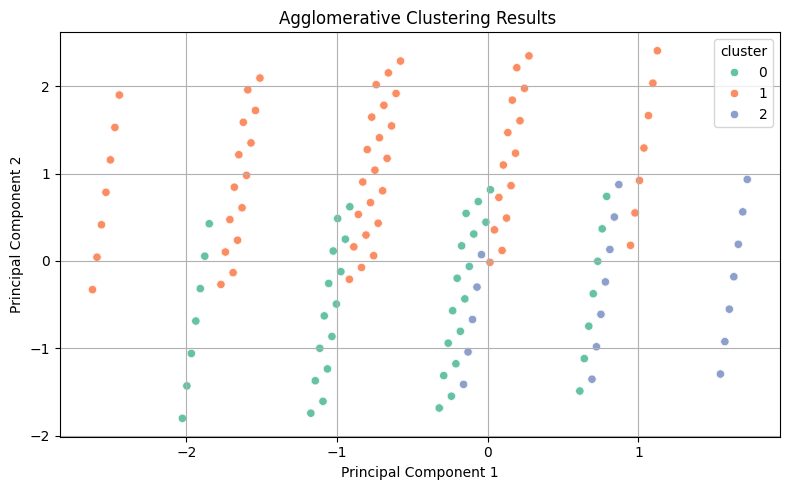

In [34]:
#PLot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Agglomerative Clustering Results ")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='cluster')
plt.tight_layout()
plt.show()

In [36]:
#Agglomerative Profile
df_features['agglo_cluster'] = agglo_labels

agglo_profile = df_features.groupby('agglo_cluster')[
    ['spender_score', 'purchase_frequency_score', 'review_sentiment_score', 'subscription_status']
].mean().round(2)
agglo_profile

,spender_score,purchase_frequency_score,review_sentiment_score,subscription_status
agglo_cluster,,,,
0,1.04,4.07,0.76,0.0
1,1.09,3.99,1.24,1.0
2,1.20,3.75,2.00,0.0
